In [2]:
# import required packages
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# load dataset from csv file
fer2013 = pd.read_csv("../../datasets/fer2013.csv")
fer2013.head()

emotions_labels_map = {'angry':0,
                       'disgust':1, 
                       'fear':2, 
                       'happy':3, 
                       'sad':4, 
                       'surprise':5, 
                       'neutral':6}

groups = fer2013.groupby('Usage')

training_data = groups.get_group('Training')
training_emotions = training_data.groupby('emotion')
test_data = groups.get_group('PublicTest')
test_emotions = test_data.groupby('emotion')
validation_data = groups.get_group('PrivateTest')
validation_emotions = validation_data.groupby('emotion')

def prepare_dataset(dataframe, image_size={'width':48, 'height':48}):
    faces_images = []
    pixels = dataframe['pixels'].tolist()
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(image_size['width'], image_size['height'])
        face = cv2.resize(face.astype('uint8'), (image_size['width'], image_size['height']))        
        faces_images.append(face.astype('float32'))
#     faces_images = np.asarray(faces_images)
#     faces_images = np.expand_dims(faces_images, -1) # (1, 48, 48)
    emotions_labels = pd.get_dummies(dataframe['emotion']).as_matrix()
    return faces_images, emotions_labels

# prepare dataset to training, test and validate model
training_faces, training_emotions = prepare_dataset(training_data)
print('training', len(training_faces), len(training_emotions))
test_faces, test_emotions = prepare_dataset(test_data)
print('test', len(test_faces), len(test_emotions))
validation_faces, validation_emotions = prepare_dataset(validation_data)
print('validation', len(validation_faces), len(validation_emotions))

training 28709 28709
test 3589 3589
validation 3589 3589


In [49]:
i = 0
images = {}
j = 0
for label in training_emotions:
    if np.argmax(label) == i:        
        images[i] = training_faces[j]
        i+=1
    j+=1

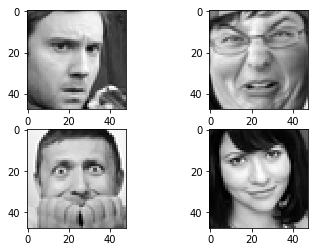

In [55]:
fig = plt.figure()
plt.subplot(221)
plt.imshow(images[0], cmap='gray')
plt.subplot(222)
plt.imshow(images[1], cmap='gray')
plt.subplot(223)
plt.imshow(images[2], cmap='gray')
plt.subplot(224)
plt.imshow(images[3], cmap='gray')

In [56]:
fig.savefig('../../overleaf/images/samples.png', dpi=400)